# Analyzing Police Activity
* Based on a project presented at <a href="https://www.datacamp.com/projects/558"> Datacamp</a>, but with more analyzes performed

## Police Activity

This analysis is based on the course "Analyzing Police Activity" from (DataCamp) [https://learn.datacamp.com/courses/analyzing-police-activity-with-pandas].

The dataset used is provided from Stanford Open Policing Project and represent the traffic stops by the police officers. 

Each row in this dataset represents one traffic stop.

The structure of this notebook is as follows:


In [2]:
import pandas as pd

ri = pd.read_csv('datasets/police.data')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## 1. Preparing the data for analysis

Before beginning the analysis, it is critical  examine and clean the dataset, to make working with it a more efficient process. In this dataset, is necessary fixing data types, handling missing values, and dropping columns and rows. while learning about the Stanford Open Policing Project dataset. 


In [3]:
# Locating missing values
print("Number of NaN values in each column:\n" + str(ri.isnull().sum()))

print("\nShape: " + str(ri.shape))

Number of NaN values in each column:
state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

Shape: (91741, 15)


With this analysis, we can note that the columns 'county_name' always have NaN values. Besides that, this dataset is restrict for just one state from US, so the column 'state' is useless. Then, we are drop this three columns from the DataFrame. 

In [4]:
# Droping the 'county_name' and 'search_type' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

Consider that the 'driver_gender' and 'violation' columns are critical to the analysis, and thus a row is useless without that data. With this arguments, we drop the rows that do not have one of this values.

In [5]:
# Droping the rows with NaN in 'driver_gender' or 'violation'
ri.dropna(subset=['driver_gender', 'violation'], inplace=True)

In [6]:
# Locating missing values
print("Number of NaN values in each column:\n" + str(ri.isnull().sum()))

print("\nShape: " + str(ri.shape))

Number of NaN values in each column:
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

Shape: (86536, 13)


Combining object columns

Currently, the date and time of each traffic stop are stored in separate object columns: 'stop_date' and 'stop_time'. We are combine these two columns into a single column, and then convert it to datetime format. This will enable convenient date-based attributes that we'll use later in the course.

In [7]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


Setting the index

The last step is set the 'stop_datetime' column as the DataFrame's index.

In [8]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## 2. Exploring the relationship between gender and policing

Does the gender of a driver have an impact on police behavior during a traffic stop? This question are answred while practicing filtering, grouping, method chaining, Boolean math, and string methods.

In [9]:
# Counting unique values
ri['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [10]:
# Counting unique values
ri['violation'].value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

The question we are trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In [11]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# Compute the violations by female drivers (as proportions)
print("- Most Common Female Violations:\n" + str(female['violation'].value_counts(normalize=True)))

print('\n')

# Compute the violations by male drivers (as proportions)
print("- Most Common Male Violations:\n" + str(male['violation'].value_counts(normalize=True)))

- Most Common Female Violations:
Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


- Most Common Male Violations:
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


Another question: Does gender affect who gets a ticket for speeding?

To answer this question, we filtering the DataFrame by multiple conditions.

In [12]:
# DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print("Stop outcomes from womans with Speeding:\n" + str(female_and_speeding['stop_outcome'].value_counts(normalize=True)))

print('\n')

# Compute the stop outcomes for male drivers (as proportions)
print("Stop outcomes from mens with Speeding:\n" + str(male_and_speeding['stop_outcome'].value_counts(normalize=True)))

Stop outcomes from womans with Speeding:
Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


Stop outcomes from mens with Speeding:
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


Comparing the arrest rate by the police districts

In [13]:
#Transform the 'is_arrested' column in bool type
ri['is_arrested'] = ri['is_arrested'].astype('bool')

# Comparing the mean of arrests in different districts
ri.groupby('district')['is_arrested'].mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

Comparing the arrest rate by the gender and police districts

In [14]:
# Comparing the mean of arrests in different districts by gender
ri.groupby(['driver_gender', 'district'])['is_arrested'].mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. Calculate the percentage of all stops in the DataFrame that result in a vehicle search, also known as the search rate.

In [15]:
# Check the data type of 'search_conducted'
print("Type from 'search_conducted' column: " + str(ri['search_conducted'].dtype))

print("\n")

# Calculate the search rate by counting the values
print(ri['search_conducted'].value_counts(normalize=True))

print("\n")

# Calculate the search rate by taking the mean
print("Search rate: " + str(ri['search_conducted'].mean()))

Type from 'search_conducted' column: bool


False    0.961785
True     0.038215
Name: search_conducted, dtype: float64


Search rate: 0.0382153092354627


Another question: Does gender affect whose vehicle is searched?

Compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

In [16]:
# Calculate the search rate for female drivers
print("Female Search Rate: " + str(ri[ri['driver_gender'] == 'F']['search_conducted'].mean()))

# Calculate the search rate for male drivers
print("Male Search Rate: " + str(ri[ri.driver_gender == 'M'].search_conducted.mean()))

print("\n")

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

Female Search Rate: 0.019180617481282074
Male Search Rate: 0.04542557598546892


driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation.

In [17]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation' ])['search_conducted'].mean())

print("\n")

# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender'])['search_conducted'].mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054

For all types of violations, the search rate is higher for males than for females, disproving the hypothesis.

Another Question: Does gender affect who is frisked during a search?

Remember that 'search_conducted' field is True if there is a search during a traffic stop, and False otherwise. There is also a related field, named 'search_type' that contains additional information about the search.

In [18]:
# Search conducted counts 
print(ri['search_conducted'].value_counts())

print("\n")

# Search type counts
print(ri['search_type'].value_counts())

False    83229
True      3307
Name: search_conducted, dtype: int64


Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Pr

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

We are compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [19]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print("Frisk type: " + str(ri.frisk.dtype))

# Take the sum of 'frisk'
print("Frisk sum: " + str(ri.frisk.sum()))

# Create a DataFrame of stops in which a search was conducted
searched = ri[ri['search_conducted'] == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print("Frisk mean: " + str(searched['frisk'].mean()))

print("\n")

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())

Frisk type: bool
Frisk sum: 303
Frisk mean: 0.09162382824312065


driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


# 3. Visual exploratory data analysis

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

Does time of day affect arrest rate?

Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. We are calculate whether the arrest rate varies by time of day.

In [20]:
# Calculate the overall arrest rate
print(ri['is_arrested'].mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour)['is_arrested'].mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


Plotting the hourly arrest rate

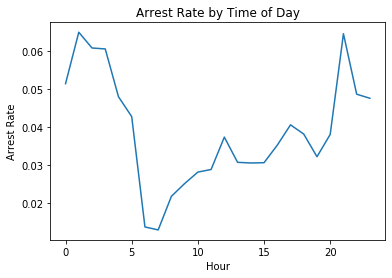

In [21]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

Are drug-related stops on the rise?

In a small portion of traffic stops, drugs are found in the vehicle during a search. We are assess whether these drug-related stops are becoming more common over time.

The Boolean column 'drugs_related_stop' indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

In [22]:
# Calculate the annual rate of drug-related stops
print(ri['drugs_related_stop'].resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


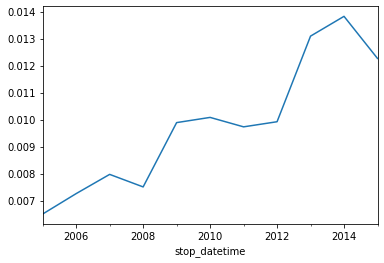

In [23]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

Comparing drug and search rates

As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

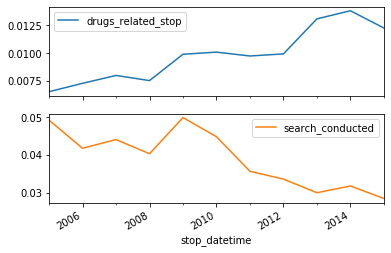

In [24]:
# Calculate and save the annual search rate
annual_search_rate = ri['search_conducted'].resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

What violations are caught in each district?

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

In [25]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri['district'], ri['violation']))

print("\n")

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri['district'], ri['violation'])

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1    

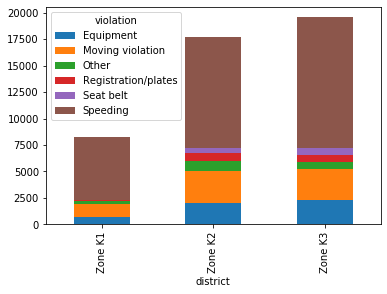

In [26]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

How often searches were performed after each type of violation.

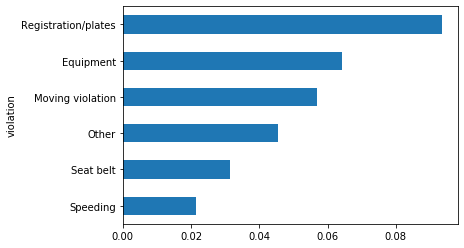

In [34]:
# Creating the search rate
search_rate = ri.groupby('violation')['search_conducted'].mean()

# Plotting the search rate
search_rate.sort_values().plot(kind='barh')

Converting stop durations to numbers

In the traffic stops dataset, the 'stop_duration' column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. We can make this data easier to analyze.

Converting:
'0-15 Min' to 8
'16-30 Min' to 23
'30+ Min' to 45


In [40]:
# Print the unique values in 'stop_duration'
print(ri['stop_duration'].unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri['stop_duration'].map(mapping)

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'].unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


How long might you be stopped for a violation? (Plotting stop length)

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the 'violation' column in this exercise, we using 'violation_raw' since it contains more detailed descriptions of the violations.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64




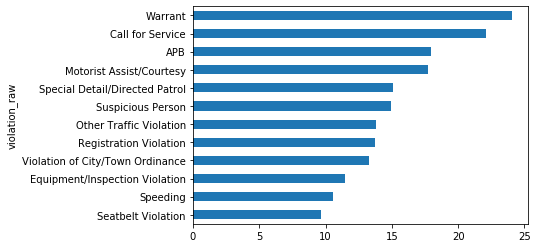

In [44]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw')['stop_minutes'].mean())

print("\n")

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()